# UAS PPW

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

csv_path = '/content/drive/MyDrive/PPW/CrawlingBerita.csv'
df = pd.read_csv(csv_path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Judul,Content,Category
0,"Bambang Haryo Apresiasi Pedagang Pasar Betro, ...","SIDOARJO (RadarJatim.id) Founder BHS Peduli, I...",Ekonomi Bisnis
1,Finansial Kuat dan Waspada Bahaya Paylater & P...,"JAKARTA (RadarJatim.id) Beberapa bulan lalu, b...",Ekonomi Bisnis
2,Nikmati Kemudahan Berbelanja dengan Transmarco...,"SURABAYA (RadarJatim.id) Hush Puppies, merek f...",Ekonomi Bisnis
3,Bambang Haryo Disambati Bunga Bank Mahal saat ...,SIDOARJO (RadarJatim.id) Founder Bambang Haryo...,Ekonomi Bisnis
4,9to9Card Hadir dengan Memberikan Banyak Banyak...,"SURABAYA (RadarJatim.id) – Hush Puppies, merek...",Ekonomi Bisnis
...,...,...,...
1270,Lulusan SMP Al Falah Sidoarjo Harus Tetap Menj...,SIDOARJO (RadarJatim.id) – Puluhan siswa SMP A...,Pendidikan
1271,"Melalui IROFONIC, Prodi HI UPN Jatim Ajak Masy...",SURABAYA (RadarJatim.id) — Program Studi Hubun...,Pendidikan
1272,"Akhiri KKN, Mahasiswa UMG Tumpengan bersama Wa...",GRESIK (RadarJatim.id) — Mahasiswa Kuliah Kerj...,Pendidikan
1273,SMA Negeri 4 Sidoarjo Gandeng Kemenag Uji Sisw...,SIDOARJO (RadarJatim.id) — Puluhan siswa SMA N...,Pendidikan


In [2]:
total = df['Category'].value_counts()
total

Ekonomi Bisnis        472
Hukum dan Kriminal    433
Pendidikan            370
Name: Category, dtype: int64

In [3]:
df.isnull().sum()


Judul       0
Content     0
Category    0
dtype: int64

In [4]:
df.shape

(1275, 3)

In [5]:
berita = df["Content"].astype(str)

In [6]:
berita

0       SIDOARJO (RadarJatim.id) Founder BHS Peduli, I...
1       JAKARTA (RadarJatim.id) Beberapa bulan lalu, b...
2       SURABAYA (RadarJatim.id) Hush Puppies, merek f...
3       SIDOARJO (RadarJatim.id) Founder Bambang Haryo...
4       SURABAYA (RadarJatim.id) – Hush Puppies, merek...
                              ...                        
1270    SIDOARJO (RadarJatim.id) – Puluhan siswa SMP A...
1271    SURABAYA (RadarJatim.id) — Program Studi Hubun...
1272    GRESIK (RadarJatim.id) — Mahasiswa Kuliah Kerj...
1273    SIDOARJO (RadarJatim.id) — Puluhan siswa SMA N...
1274    PASURUAN (RadarJatim.id) – Banyak cara untuk m...
Name: Content, Length: 1275, dtype: object

# Cleaning data  
Tahap membersihkan data dari noise, menghapus
karakter khusus, menghapus angka dan menghilangkan spasi yang
berlebihan. Cleaning data dengan menggunakan library re

In [7]:
!pip install nltk
!pip install Sastrawi
!pip install joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.4 MB/s eta 0:00:00


In [8]:
import pandas as pd
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import joblib

In [9]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Lowecase  
proses untuk mengubah semua huruf dalam dokumen
menjadi huruf kecil (lowercase), yang bertujuan untuk memastikan
konsistensi dalam pemrosesan teks. Case folding dengan lowercase

In [10]:
preprocessing = berita.str.lower()

In [11]:
preprocessing

0       sidoarjo (radarjatim.id) founder bhs peduli, i...
1       jakarta (radarjatim.id) beberapa bulan lalu, b...
2       surabaya (radarjatim.id) hush puppies, merek f...
3       sidoarjo (radarjatim.id) founder bambang haryo...
4       surabaya (radarjatim.id) – hush puppies, merek...
                              ...                        
1270    sidoarjo (radarjatim.id) – puluhan siswa smp a...
1271    surabaya (radarjatim.id) — program studi hubun...
1272    gresik (radarjatim.id) — mahasiswa kuliah kerj...
1273    sidoarjo (radarjatim.id) — puluhan siswa sma n...
1274    pasuruan (radarjatim.id) – banyak cara untuk m...
Name: Content, Length: 1275, dtype: object

## Tokenisasi  
proses membagi teks menjadi unit-unit terpisah yang
disebut token. Token merupakan unit terkecil dalam teks, yang bisa
berupa kata, frasa, karakter, atau bahkan simbol tertentu. Tujuan dari
tokenisasi adalah untuk mempermudah pemrosesan dan analisis lebih
lanjut terhadap teks. Tokenizing dengan library nltk.tokenize.


In [12]:
def process_tokenize(text):
    text = text.split()
    return text

In [13]:
preprocessing = preprocessing.apply(process_tokenize)
preprocessing

0       [sidoarjo, (radarjatim.id), founder, bhs, pedu...
1       [jakarta, (radarjatim.id), beberapa, bulan, la...
2       [surabaya, (radarjatim.id), hush, puppies,, me...
3       [sidoarjo, (radarjatim.id), founder, bambang, ...
4       [surabaya, (radarjatim.id), –, hush, puppies,,...
                              ...                        
1270    [sidoarjo, (radarjatim.id), –, puluhan, siswa,...
1271    [surabaya, (radarjatim.id), —, program, studi,...
1272    [gresik, (radarjatim.id), —, mahasiswa, kuliah...
1273    [sidoarjo, (radarjatim.id), —, puluhan, siswa,...
1274    [pasuruan, (radarjatim.id), –, banyak, cara, u...
Name: Content, Length: 1275, dtype: object

## Punctuation  
Menghapus seluruh tanda baca yang ada pada konten berita Cleaning data dengan menggunakan library re

In [14]:
def process_punctuation(tokens):
    cleaned_tokens = [re.sub(r'[.,()&=%:-]', '', token) for token in tokens]
    cleaned_tokens = [re.sub(r'\d+', '', token) for token in cleaned_tokens]

    return cleaned_tokens

In [15]:
preprocessing = preprocessing.apply(process_punctuation)
preprocessing

0       [sidoarjo, radarjatimid, founder, bhs, peduli,...
1       [jakarta, radarjatimid, beberapa, bulan, lalu,...
2       [surabaya, radarjatimid, hush, puppies, merek,...
3       [sidoarjo, radarjatimid, founder, bambang, har...
4       [surabaya, radarjatimid, –, hush, puppies, mer...
                              ...                        
1270    [sidoarjo, radarjatimid, –, puluhan, siswa, sm...
1271    [surabaya, radarjatimid, —, program, studi, hu...
1272    [gresik, radarjatimid, —, mahasiswa, kuliah, k...
1273    [sidoarjo, radarjatimid, —, puluhan, siswa, sm...
1274    [pasuruan, radarjatimid, –, banyak, cara, untu...
Name: Content, Length: 1275, dtype: object

## stopword  
Tahap menghapus kata-kata yang kurang
berrmakna atau tidak memiliki arti seperti kata: saya, dan, atau. Filtering
stop word dengan library nltk, dengan menggunakan kamus stopword
bahasa Indonesia.


In [16]:
def process_stopword_token(tokens):
    stop_words = set(stopwords.words("indonesian"))
    # custom_stop_words = ['masingmasing','tiaptiap','satusatunya', 'intinya', 'seiring']
    # stop_words.update(custom_stop_words)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return " ".join(filtered_tokens)

In [17]:
preprocessing = preprocessing.apply(process_stopword_token)
preprocessing

0       sidoarjo radarjatimid founder bhs peduli ir h ...
1       jakarta radarjatimid beredar kabar fresh gradu...
2       surabaya radarjatimid hush puppies merek fashi...
3       sidoarjo radarjatimid founder bambang haryo so...
4       surabaya radarjatimid – hush puppies merek fas...
                              ...                        
1270    sidoarjo radarjatimid – puluhan siswa smp al f...
1271    surabaya radarjatimid — program studi hubungan...
1272    gresik radarjatimid — mahasiswa kuliah kerja n...
1273    sidoarjo radarjatimid — puluhan siswa sma nege...
1274    pasuruan radarjatimid – membentuk karakter mem...
Name: Content, Length: 1275, dtype: object

## Steming  
Proses untuk menghapus kata imbuhan untuk mendapatkan
kata dasarnya. Pada proses stemming dengan menggunakan
library sastrawi. PySastrawi adalah sebuah library Python yang
menyediakan fungsi-fungsi untuk melakukan pemrosesan bahasa alami
dalam bahasa Indonesia, seperti stemming (pemenggalan kata ke bentuk
dasarnya).

In [18]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [20]:
preprocessing = preprocessing.apply(lambda text:stemmer.stem(text))
preprocessing

0       sidoarjo radarjatimid founder bhs peduli ir h ...
1       jakarta radarjatimid edar kabar fresh graduate...
2       surabaya radarjatimid hush puppies merek fashi...
3       sidoarjo radarjatimid founder bambang haryo so...
4       surabaya radarjatimid hush puppies merek fashi...
                              ...                        
1270    sidoarjo radarjatimid puluh siswa smp al falah...
1271    surabaya radarjatimid program studi hubung int...
1272    gresik radarjatimid mahasiswa kuliah kerja nya...
1273    sidoarjo radarjatimid puluh siswa sma negeri s...
1274    pasuruan radarjatimid bentuk karakter biasa pe...
Name: Content, Length: 1275, dtype: object

In [21]:
df['preprocessing-berita'] = preprocessing
df.to_csv('/content/drive/MyDrive/PPW/preprocessing-berita.csv', index=False)

# fitur ekstraksi  



In [22]:
csv_preprocessing = '/content/drive/MyDrive/PPW/preprocessing-berita.csv'
data = pd.read_csv(csv_preprocessing)
data

,Judul,Content,Category,preprocessing-berita
0,"Bambang Haryo Apresiasi Pedagang Pasar Betro, ...","SIDOARJO (RadarJatim.id) Founder BHS Peduli, I...",Ekonomi Bisnis,sidoarjo radarjatimid founder bhs peduli ir h ...
1,Finansial Kuat dan Waspada Bahaya Paylater & P...,"JAKARTA (RadarJatim.id) Beberapa bulan lalu, b...",Ekonomi Bisnis,jakarta radarjatimid edar kabar fresh graduate...
2,Nikmati Kemudahan Berbelanja dengan Transmarco...,"SURABAYA (RadarJatim.id) Hush Puppies, merek f...",Ekonomi Bisnis,surabaya radarjatimid hush puppies merek fashi...
3,Bambang Haryo Disambati Bunga Bank Mahal saat ...,SIDOARJO (RadarJatim.id) Founder Bambang Haryo...,Ekonomi Bisnis,sidoarjo radarjatimid founder bambang haryo so...
4,9to9Card Hadir dengan Memberikan Banyak Banyak...,"SURABAYA (RadarJatim.id) – Hush Puppies, merek...",Ekonomi Bisnis,surabaya radarjatimid hush puppies merek fashi...
...,...,...,...,...
1270,Lulusan SMP Al Falah Sidoarjo Harus Tetap Menj...,SIDOARJO (RadarJatim.id) – Puluhan siswa SMP A...,Pendidikan,sidoarjo radarjatimid puluh siswa smp al falah...
1271,"Melalui IROFONIC, Prodi HI UPN Jatim Ajak Masy...",SURABAYA (RadarJatim.id) — Program Studi Hubun...,Pendidikan,surabaya radarjatimid program studi hubung int...
1272,"Akhiri KKN, Mahasiswa UMG Tumpengan bersama Wa...",GRESIK (RadarJatim.id) — Mahasiswa Kuliah Kerj...,Pendidikan,gresik radarjatimid mahasiswa kuliah kerja nya...
1273,SMA Negeri 4 Sidoarjo Gandeng Kemenag Uji Sisw...,SIDOARJO (RadarJatim.id) — Puluhan siswa SMA N...,Pendidikan,sidoarjo radarjatimid puluh siswa sma negeri s...


In [23]:
preprocessing_berita = data["preprocessing-berita"]

## TF-IDF  
Pada Tahap ekstraksi fitur, dilakukan dengan metode TF-IDF (Term
Frequency-Inverse Document Frequency) melibatkan perhitungan nilai TF-IDF
untuk setiap kata dalam setiap dokumen. Menghitung TF adalah menghitung
frekuensi kemunculan setiap kata dalam dokumen tertentu. Kemudian
menghitung DF adalah menghitung jumlah dokumen dalam korpus yang
mengandung kata tertentu. Lalu IDF yaitu menghitung kebalikan dari DF, dapat
dihitung dengan menggunakan rumus logaritma dari jumlah total dokumen
dibagi dengan DF untuk kata tersebut. Dan kemudian TF-IDF yaitu mengalikan
nilai TF dengan nilai IDF untuk setiap kata dalam setiap dokumen. Akan
menghasilkan representasi vektor numerik yang memperhitungkan pentingnya
kata dalam dokumen dan dalam korpus secara keseluruhan

In [24]:
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf = tfidfvectorizer.fit_transform(preprocessing_berita)
tfidf_token = tfidfvectorizer.get_feature_names_out()

In [25]:
tfidf_df = pd.DataFrame(data = tfidf.toarray(), columns = tfidf_token)
tfidf_df

,aa,aabila,aac,aaji,aamiiin,aamiin,aap,aaron,ab,aba,...,zuhri,zulfatur,zulham,zulhas,zulkas,zulkifli,zumami,zuna,zuraidah,zurasta
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split Data  
Pembagian dataset dibagi menjadi dua yaitu data training dan data testing. Data training digunakan untuk proses pelatihan. Data testing digunakan untuk testing

In [26]:
X = tfidf_df
y = df['Category']

y

0       Ekonomi Bisnis
1       Ekonomi Bisnis
2       Ekonomi Bisnis
3       Ekonomi Bisnis
4       Ekonomi Bisnis
             ...      
1270        Pendidikan
1271        Pendidikan
1272        Pendidikan
1273        Pendidikan
1274        Pendidikan
Name: Category, Length: 1275, dtype: object

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.head()

,aa,aabila,aac,aaji,aamiiin,aamiin,aap,aaron,ab,aba,...,zuhri,zulfatur,zulham,zulhas,zulkas,zulkifli,zumami,zuna,zuraidah,zurasta
413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Classification  
Metode Naive Bayes adalah metode klasifikasi yang berdasarkan pada Teorema
Bayes dengan asumsi independensi antara fitur-fitur yang ada. Metode ini cocok untuk digunakan pada data yang memiliki banyak fitur. Pada dasarnya,
algoritma Naive Bayes menghitung probabilitas posterior dari setiap kelas berdasarkan fitur-fitur yang diamati.

In [29]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred_naivebayes = naive_bayes_classifier.predict(X_test)

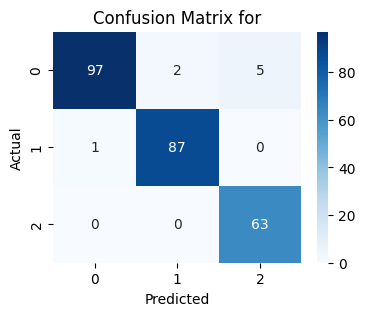

Accuracy = 0.9686274509803922


In [30]:
cm_naivebayes = confusion_matrix(y_test, y_pred_naivebayes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_naivebayes)
accuracy = accuracy_score(y_test, y_pred_naivebayes)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_naivebayes, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for')
plt.show()

print('Accuracy =', accuracy)

In [31]:
joblib.dump(tfidfvectorizer, 'tfidf_vectorizer')

['tfidf_vectorizer']

In [32]:
joblib.dump(naive_bayes_classifier, 'nb_model')

['nb_model']

# Aplikasi Predikisi

Aplikasi untuk klasifikasi berita 👉 [Streamlit](https://uasppw.streamlit.app/)